In [36]:
import pandas as pd
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv(r'C:\Users\heena\Downloads\SMSSpamCollection.csv', delimiter='\t', on_bad_lines='skip')

# Set the correct column names
df.columns = ['label', 'message']

# Select only the relevant columns
df = df[['label', 'message']]

In [26]:
print(df.columns)

Index(['label', 'message'], dtype='object')


In [27]:
# Display the first few rows to check if it loaded correctly
print(df.head())


  label                                            message
0   ham                      Ok lar... Joking wif u oni...
1  spam  Free entry in 2 a wkly comp to win FA Cup fina...
2   ham  U dun say so early hor... U c already then say...
3   ham  Nah I don't think he goes to usf, he lives aro...
4  spam  FreeMsg Hey there darling it's been 3 week's n...


In [35]:
# Get the length of each message
df['message_length'] = df['message'].apply(len)

In [29]:
# Data cleaning
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

df['cleaned_message'] = df['message'].apply(clean_text)

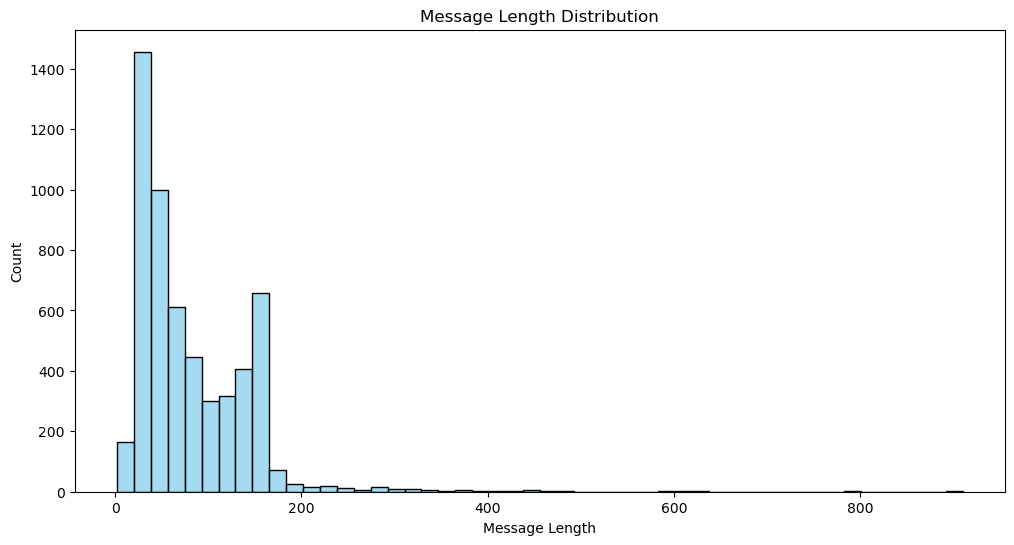

In [37]:
# Plot a graph showing message length distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['message_length'], bins=50, color='skyblue')
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

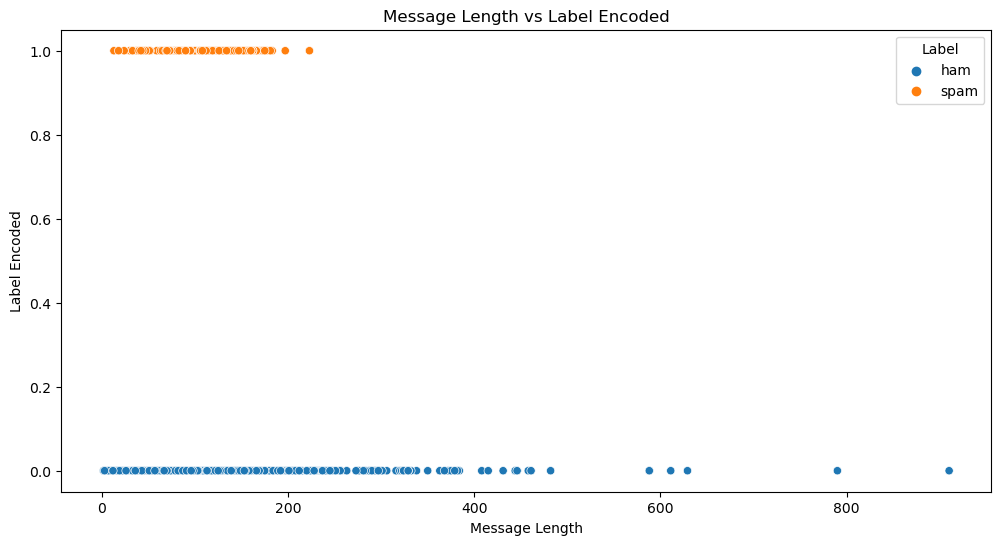

In [38]:
# Plot a scatter plot of message length vs label encoded
plt.figure(figsize=(12, 6))
sns.scatterplot(x='message_length', y='label_encoded', data=df, hue='label')
plt.title('Message Length vs Label Encoded')
plt.xlabel('Message Length')
plt.ylabel('Label Encoded')
plt.legend(title='Label')
plt.show()

In [30]:
# Encode labels
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

In [31]:
# Feature engineering
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['cleaned_message']).toarray()
y = df['label_encoded']

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [33]:
# Model evaluation
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9766816143497757
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       955
           1       1.00      0.84      0.91       160

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [34]:
# Save the model and vectorizer
joblib.dump(model, 'sms_spam_classifier_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']